In [1]:
import numpy as np
import matplotlib.pyplot as plt
from seaborn import heatmap

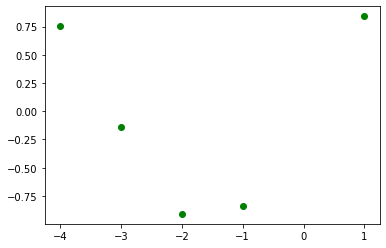

In [3]:
def dataSet_2():
    X_train = np.array([-4, -3, -2, -1, 1]).reshape(-1, 1)
    Y_train = np.sin(X_train)
    X_test = np.arange(-5, 5, 0.2).reshape(-1, 1)
    return X_train,Y_train,X_test

x_train, y_train, x_test = dataSet_2()
plt.scatter(x_train, y_train,color='g')

In [4]:
def kernel(x1, x2, scale=1.0, sigma_f=1.0):    
    sqdist = np.sum(x1 ** 2, 1).reshape(-1, 1) + np.sum(x2 ** 2, 1) - 2 * np.dot(x1, x2.T)
    return sigma_f ** 2 * np.exp(-0.5/scale ** 2 * sqdist)

In [5]:
def plot_graph(mu, cov, X, X_train=None, Y_train=None, samples=[]):
    X = X.ravel()
    mu = mu.ravel()
    uncertainty = 1.96 * np.sqrt(np.diag(cov))

    plt.fill_between(X, mu + uncertainty, mu - uncertainty, alpha=0.1)
    plt.plot(X, mu, label='Mean')
    for i, sample in enumerate(samples):
        plt.plot(X, sample, lw=1, ls='--', label=f'Sample {i+1}')
    if X_train is not None:
        plt.plot(X_train, Y_train, 'rx')
    plt.legend()

In [6]:
beta = 25
C = kernel(x_train, x_train)
k = kernel(x_train, x_test)
c = kernel(x_test, x_test)

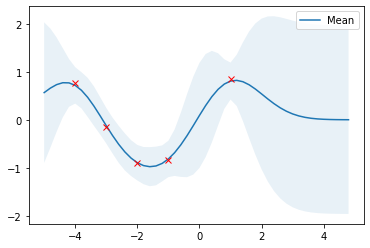

In [7]:
C += np.eye(C.shape[0]) * (1/beta)
L = np.linalg.cholesky(C)
alpha = np.dot(np.linalg.inv(L.T), np.dot(np.linalg.inv(L), y_train))
f = np.dot(k.T, alpha)
v = np.dot(np.linalg.inv(L), k)
var = c - np.dot(v.T, v)
plot_graph(f, var, x_test, x_train, y_train)

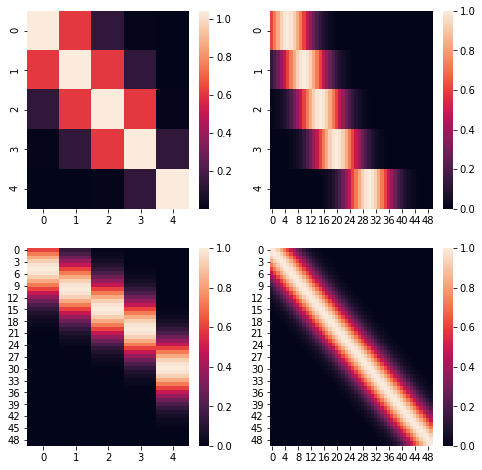

In [8]:
fig, axes = plt.subplots(2, 2, figsize=(8, 8))
heatmap(C, ax=axes[0, 0])
heatmap(k, ax=axes[0, 1])
heatmap(k.T, ax=axes[1, 0])
heatmap(c, ax=axes[1, 1])

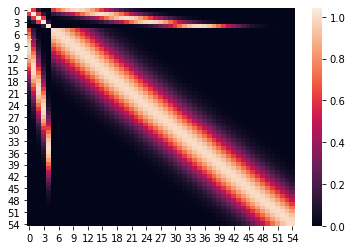

In [9]:
C_n_plus_1 = np.vstack((np.hstack((C, k)), np.hstack((k.T, c))))
heatmap(C_n_plus_1)